In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

# Converting text files into dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/data/'

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
source_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/data'
train_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Train_Data'
test_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Test_Data'
val_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Validation_Data'

# Create folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Collect all JPEG filenames
jpeg_files = [f for f in os.listdir(source_folder) if f.endswith('.jpeg')]
jpeg_filenames = [os.path.splitext(f)[0] for f in jpeg_files]

# Split filenames into train, test, val (70%, 15%, 15%)
train_filenames, test_val_filenames = train_test_split(jpeg_filenames, test_size=0.3, random_state=42)
test_filenames, val_filenames = train_test_split(test_val_filenames, test_size=0.5, random_state=42)

# Function to copy files
def copy_files(filenames, destination_folder):
    for name in filenames:
        jpeg_file = f'{name}.jpeg'
        txt_file = f'{name}.txt'
        jpeg_dest_path = os.path.join(destination_folder, jpeg_file)
        txt_dest_path = os.path.join(destination_folder, txt_file)

        # Check if files already exist in destination
        if not os.path.exists(jpeg_dest_path) and not os.path.exists(txt_dest_path):
            shutil.copy(os.path.join(source_folder, jpeg_file), jpeg_dest_path)
            shutil.copy(os.path.join(source_folder, txt_file), txt_dest_path)
        else:
            print(f"Files {jpeg_file} and {txt_file} already exist in {destination_folder}. Skipping.")

# Copy files to respective folders
copy_files(train_filenames, train_folder)
copy_files(test_filenames, test_folder)
copy_files(val_filenames, val_folder)

print("Data split and copied successfully.")


# Converting dataframe into Pascal-voc format

In [ ]:
import os
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

def process_folder(folder_path, output_csv):
    data = [os.path.join(folder_path, x) for x in os.listdir(folder_path)]
    images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
    labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

    df = pd.DataFrame(columns=['image_name', 'object', 'x_cen', 'y_cen', 'w', 'h'])
    i = 0
    for id in tqdm(images):
        label = open(id[:-5] + '.txt', 'r')
        a = label.read()
        label.close()
        label = a.split('\n')
        cleaned_label = label[:-1]

        for name in cleaned_label:
            ind_label = name.split(' ')
            df.loc[i, 'image_name'] = os.path.basename(id)
            df.loc[i, 'object'] = int(ind_label[0])
            df.loc[i, 'x_cen'] = float(ind_label[1])
            df.loc[i, 'y_cen'] = float(ind_label[2])
            df.loc[i, 'w'] = float(ind_label[3])
            df.loc[i, 'h'] = float(ind_label[4])
            i += 1

    # Pascal VOC format conversion
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    pascal_voc = pd.DataFrame(columns=column_name)
    for i in tqdm(range(len(df))):
        pascal_voc.loc[i, 'filename'] = df.loc[i, 'image_name']
        pascal_voc.loc[i, 'width'] = 512
        pascal_voc.loc[i, 'height'] = 512
        pascal_voc.loc[i, 'class'] = 'crop' if df.loc[i, 'object'] == 0 else 'weed'
        pascal_voc.loc[i, 'xmin'] = int((df.loc[i, 'x_cen'] - df.loc[i, 'w']/2)*512)
        pascal_voc.loc[i, 'ymin'] = int((df.loc[i, 'y_cen'] - df.loc[i, 'h']/2)*512)
        pascal_voc.loc[i, 'xmax'] = int((df.loc[i, 'x_cen'] + df.loc[i, 'w']/2)*512)
        pascal_voc.loc[i, 'ymax'] = int((df.loc[i, 'y_cen'] + df.loc[i, 'h']/2)*512)

    # Save to CSV
    pascal_voc.to_csv(output_csv, index=False)

# Paths to folders
train_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Train_Data'
test_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Test_Data'
val_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Validation_Data'
output_csv_folder = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/DataCSV'

# Process each folder
process_folder(train_folder, os.path.join(output_csv_folder, 'train.csv'))
process_folder(test_folder, os.path.join(output_csv_folder, 'test.csv'))
process_folder(val_folder, os.path.join(output_csv_folder, 'val.csv'))

print("CSV files generated successfully.")

100%|██████████| 283/283 [00:00<00:00, 983.48it/s] 


CSV files generated successfully.


In [ ]:
import pandas as pd

# Paths to the CSV files
train_csv_path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/DataCSV/train.csv'
test_csv_path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/DataCSV/test.csv'
val_csv_path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/DataCSV/val.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
val_df = pd.read_csv(val_csv_path)

# Display the first few rows to verify
print("Train Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())
print("\nValidation Data:")
print(val_df.head())


Train Data:
           filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_6481.jpeg    512     512  weed    97   124   452   453
1   agri_0_667.jpeg    512     512  weed    11   122   402   361
2   agri_0_667.jpeg    512     512  weed   308     0   510   155
3   agri_0_667.jpeg    512     512  weed     1   352   192   477
4  agri_0_6520.jpeg    512     512  crop    48     3   442   512

Test Data:
           filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_6783.jpeg    512     512  weed    70    71   430   493
1  agri_0_6703.jpeg    512     512  weed     4    48   429   512
2  agri_0_6857.jpeg    512     512  crop    37    44   460   437
3  agri_0_7079.jpeg    512     512  weed   106    93   251   412
4  agri_0_6977.jpeg    512     512  weed   213   126   451   375

Validation Data:
           filename  width  height class  xmin  ymin  xmax  ymax
0  agri_0_6765.jpeg    512     512  weed    77   152   469   416
1  agri_0_6717.jpeg    512     512  crop    23  

# Visualizing labels

Displaying image: /content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Train_Data/agri_0_6690.jpeg


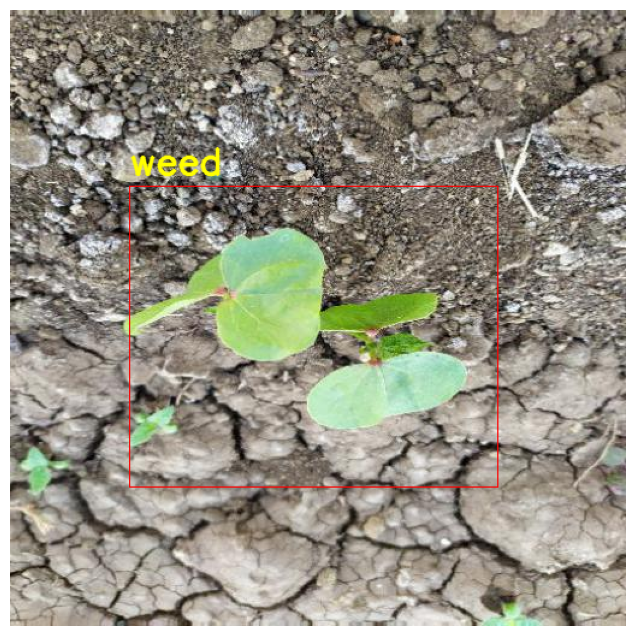

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming you've set the path to your images
image_path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Train_Data/'  # Adjust to the path where your images are stored

# Choose an index to visualize
any_index_number = 12  # You can change this to view different images

# Get the image file name from the DataFrame
image_file = train_df.loc[any_index_number, 'filename']
full_image_path = image_path + image_file
print("Displaying image:", full_image_path)

# Load and display the image with bounding boxes
test_img = cv2.cvtColor(cv2.imread(full_image_path), cv2.COLOR_BGR2RGB)
test_annotations = train_df[train_df['filename'] == image_file].reset_index(drop=True)

for i in range(len(test_annotations)):
    rec = cv2.rectangle(test_img,
                        (test_annotations.loc[i, 'xmin'], test_annotations.loc[i, 'ymin']),
                        (test_annotations.loc[i, 'xmax'], test_annotations.loc[i, 'ymax']),
                        (255, 0, 0), 1, 1)
    text = cv2.putText(rec, test_annotations.loc[i, 'class'],
                       (test_annotations.loc[i, 'xmin'], test_annotations.loc[i, 'ymin'] - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)

plt.figure(figsize=(8, 8))
plt.imshow(text)
plt.axis('off')
plt.show()

# Setting up the model

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from PIL import Image
import os

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")

        # Extract bounding box coordinates and labels
        bbox = self.annotations.iloc[idx, 4:8].values
        # Convert the bbox coordinates to a numpy array first
        bbox = np.array(bbox, dtype=np.float32)
        # Now convert it to a PyTorch tensor
        bbox = torch.from_numpy(bbox).unsqueeze(0)  # Add an extra dimension

        # Convert labels to numeric values
        label_dict = {'crop': 2, 'weed': 1}
        label = self.annotations.iloc[idx, 3]
        label = label_dict[label]

        labels = torch.tensor([label], dtype=torch.int64)

        target = {}
        target['boxes'] = bbox
        target['labels'] = labels

        if self.transform:
            image = self.transform(image)

        return image, target

In [ ]:
def get_transform():
    return T.Compose([T.ToTensor()])

In [ ]:
csvfilespath = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/DataCSV/'
trainrootdata = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Train_Data/'
testrootdata = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Test_Data/'
validationrootdata = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/Validation_Data/'

train_dataset = CustomDataset(csv_file=csvfilespath+'train.csv', root_dir=trainrootdata, transform=get_transform())
val_dataset = CustomDataset(csv_file=csvfilespath+'val.csv', root_dir=validationrootdata, transform=get_transform())
test_dataset = CustomDataset(csv_file=csvfilespath+'test.csv', root_dir=testrootdata, transform=get_transform())

train_data_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_data_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
test_data_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 3  # 2 classes (your classes) + background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 10  # Adjust as per your requirement
model_save_path = '/content/drive/MyDrive/WeedAndPlantDataSet/agri_data/FRCNNV2Models'

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    num_batches = 0

    for images, targets in train_data_loader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
        num_batches += 1

    epoch_loss = total_loss / num_batches
    print(f'Epoch {epoch} finished, Loss: {epoch_loss}')

    # Save the model after each epoch to the specified folder
    model_save_filename = os.path.join(model_save_path, f'faster_rcnn_epoch_{epoch}.pth')
    torch.save(model.state_dict(), model_save_filename)

Epoch 0 finished, Loss: 0.1715678928100931
Epoch 1 finished, Loss: 0.13164666037780146
Epoch 2 finished, Loss: 0.11892064177117295
Epoch 3 finished, Loss: 0.1074338951019457
Epoch 4 finished, Loss: 0.09944590254177375
Epoch 5 finished, Loss: 0.09348295187546733
Epoch 6 finished, Loss: 0.08690756500199519
Epoch 7 finished, Loss: 0.08480056963902152
Epoch 8 finished, Loss: 0.08060846503988649
Epoch 9 finished, Loss: 0.0768056303952198
